In [22]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import math
import gc

import matplotlib.pyplot as plt
import seaborn as sns

import the data

In [23]:
train=pd.read_csv("./data/Train.csv")
test=pd.read_csv("./data/Test.csv")
sample_sub=pd.read_csv("./data/sample_sub.csv")

In [24]:
train.head()


,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750


In [25]:
train.precip[2]

'0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.051,0.936,0.612,0.204,3.112,0.595,0.017,0.782,0.289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8039999999999985,0.0,0.0,0.0,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.034,0.017,0.017,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0'

In [26]:
# covert features  from string to List of values 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)
        
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train[feature]=train[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])
    test[feature]=test[feature].apply(lambda x: [ replace_nan(X)  for X in x.replace("nan"," ").split(",")])    

In [27]:
len(train.precip[2])


121

## Analysis of the nan values

### stats

In [59]:
list_columns = ['temp', 'precip', 'rel_humidity', 'wind_dir', 'wind_spd', 'atmos_press']

In [29]:
def count_nan(row):
    counter = 0
    if isinstance(row, type(list())):
        for x in row:
            if np.isnan(x):
                counter += 1
        return counter 
    else: return np.nan
    
for col in list_columns:
    train['nan_' + str(col)] = round(train[col].apply(count_nan))

In [30]:
train.drop(list_columns, axis=1).head()

,ID,location,target,nan_temp,nan_precip,nan_rel_humidity,nan_wind_dir,nan_wind_spd,nan_atmos_press
0,ID_train_0,C,45.126304,105,105,105,105,105,105
1,ID_train_1,D,79.131702,0,0,0,0,0,0
2,ID_train_10,A,32.661304,1,1,1,46,46,1
3,ID_train_100,A,53.850238,0,0,0,51,51,0
4,ID_train_1000,A,177.418750,91,91,91,91,91,91


- heat map nan values:


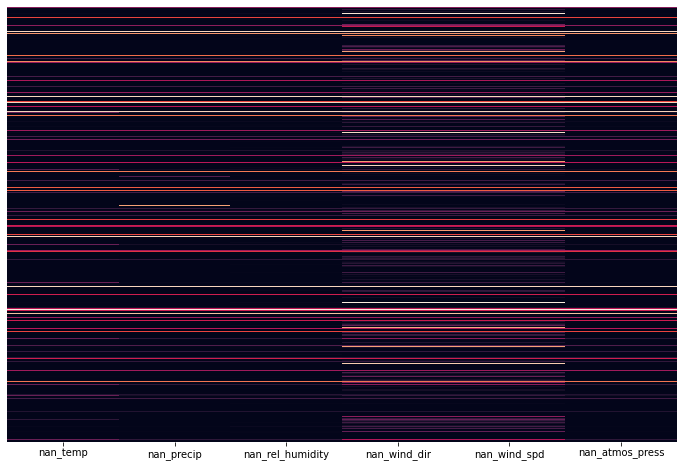

In [61]:
list_columns = list_columns+ ['ID', 'location', 'target']
plt.figure(figsize=(12, 8))
sns.heatmap(train.drop(list_columns, axis=1), cbar=False,yticklabels=False)
plt.show()

percentage of missing values

In [66]:
# 
data_nan = train.drop(list_columns, axis=1).head()

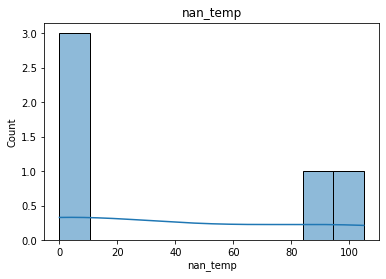

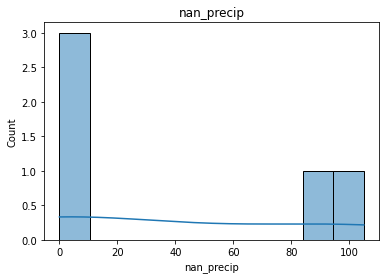

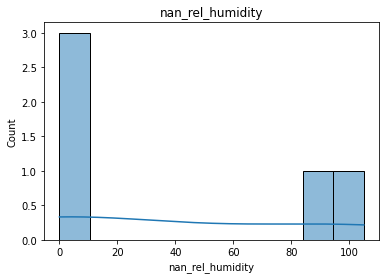

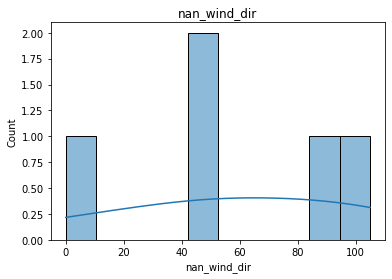

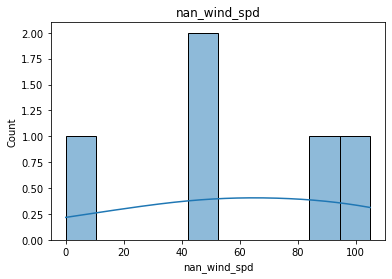

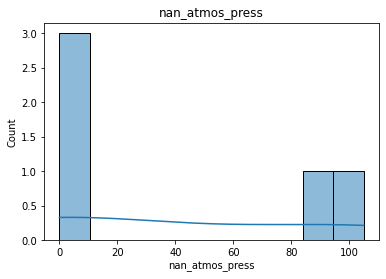

In [78]:
counter = 0
for i, col in enumerate(data_nan.columns):
    plt.figure(i)
    sns.histplot(data_nan[col], bins=10, kde=True) #, ax=[int(counter/3)][counter%3])
    plt.title(col)
    counter += 1

### Precipitation

In [31]:
precipitation = pd.DataFrame(train.precip)
precipitation.head()

,precip
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0..."
2,"[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [32]:
# count nan values in each row
def count_nan(row):
    counter = 0
    for x in row:
        if np.isnan(x):
            counter += 1
    return counter 

precipitation['count_nan'] = round(precipitation['precip'].apply(count_nan))
        

In [33]:
# removing the nan values and show the remain values
def mean_without_nan(row):
    new_row = []
    for x in row: 
        if np.isnan(x): pass
        else: new_row.append(x)
    return np.mean(new_row)

In [34]:
precipitation['mean_without_nan'] = precipitation['precip'].apply(mean_without_nan)

In [35]:
precipitation.head()

,precip,count_nan,mean_without_nan
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",105,0.000000
1,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...",0,0.007025
2,"[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...",1,0.151767
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...",0,1.127273
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",91,0.005100


- how many observations contain nan values?

In [36]:
precipitation[(precipitation['count_nan'] != 0)].count()

precip              2866
count_nan           2866
mean_without_nan    2866
dtype: int64

2 866 of 15 539 observation contains nan values = 18.4%


distribution of the amount of nan values

<AxesSubplot:xlabel='mean_without_nan', ylabel='Count'>

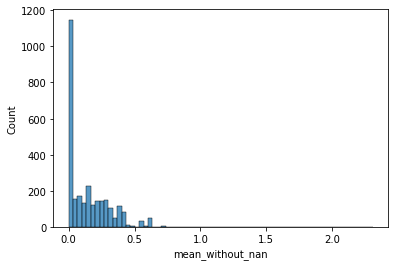

In [37]:
sns.histplot(precipitation[(precipitation['count_nan'] != 0)].mean_without_nan)

In [38]:
precipitation[(precipitation['mean_without_nan']==0)].mean_without_nan.count()


1335

1335 observation have mean 0 after removing nan values. the nan values kan be set to 0 in this case

intensive look into the observations cointaining more than 50 % of nan values

In [39]:
precip_nan_61 = precipitation[(precipitation['count_nan'] >= 61)]
precip_nan_61.shape

(778, 3)

778 observation contain more than 50% as nan value

for data preprocessing precipitation: 
- changing nan values to the mean precipitation for each observation

In [40]:
def fill_nan_in_row(row):
    # calculate the mean ignoring nan values
    mean = round(np.nanmean(row),2)
    new_row = []
    for x in row: 
        if np.isnan(x):
            new_row.append(mean)
        else: 
            new_row.append(x)
    return new_row

In [41]:
precipitation['precip_fill'] = precipitation['precip'].apply(fill_nan_in_row)
precipitation.head()

,precip,count_nan,mean_without_nan,precip_fill
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",105,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...",0,0.007025,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0..."
2,"[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...",1,0.151767,"[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...",0,1.127273,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",91,0.005100,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Temperatur

In [42]:
temperatur = pd.DataFrame(train.temp)
temperatur.head()

,temp
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,"[22.53333333, 21.71666667, 20.83333333, 20.983..."
2,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21...."
3,"[22.96666667, 24.26666667, 25.275, 25.625, 25...."
4,"[21.875, 21.575, 21.525, 21.43333333, 20.50833..."


- count nan values

In [43]:
# count nan values in each row
def count_nan(row):
    counter = 0
    for x in row:
        if np.isnan(x):
            counter += 1
    return counter 

temperatur['count_nan'] = round(temperatur['temp'].apply(count_nan))
temperatur.head()
        

,temp,count_nan
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",105
1,"[22.53333333, 21.71666667, 20.83333333, 20.983...",0
2,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....",1
3,"[22.96666667, 24.26666667, 25.275, 25.625, 25....",0
4,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...",91


- distribution of the nan values

3191 values contains nan values from 15 539


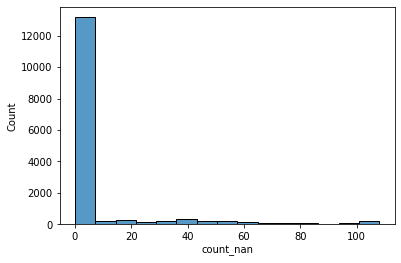

In [44]:
sns.histplot(temperatur['count_nan'])

print('{} values contains nan values from 15 539'.format(
        temperatur[(temperatur['count_nan']!=0)].temp.count(), 
))

ca 20% contain nan values

- look into the distribution of the observation without nan values

In [45]:
temperatur.head()

,temp,count_nan
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",105
1,"[22.53333333, 21.71666667, 20.83333333, 20.983...",0
2,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....",1
3,"[22.96666667, 24.26666667, 25.275, 25.625, 25....",0
4,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...",91


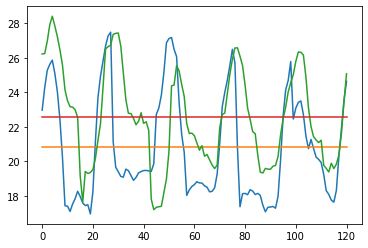

In [46]:
# have a look into the temp data

temp_wo_nan = temperatur[(temperatur['count_nan']==0)]
l_temp = temp_wo_nan.temp[1]
for observ in temp_wo_nan.temp[1:3]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    sns.lineplot(x=[i for i in range(len(observ))] ,y=np.mean(observ))
    

    

There are cycle trends in the temperatur features and 
the temperatur cycles are in different points 

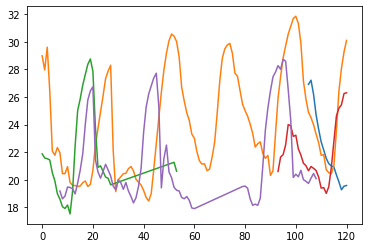

In [47]:
temp_w_nan = temperatur[(temperatur['count_nan']!=0)]

for observ in temp_w_nan.temp[0:5]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    #sns.lineplot(x=[i for i in range(len(observ))] ,y=np.nanmean(observ))
    

- for data preparation the reduction of the temperatur by doing maen average

In [48]:
def mean(row):
    return np.nanmean(row)


temperatur['temp_mean'] = temperatur['temp'].apply(mean)

<AxesSubplot:xlabel='temp_mean', ylabel='Count'>

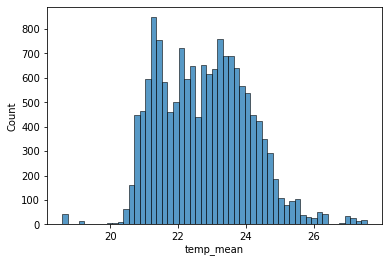

In [49]:
sns.histplot(temperatur.temp_mean)

In [50]:
temperatur[(temperatur['temp_mean']<19)].shape

(43, 3)

- outliers?
have a look into the  mean temperatur lower than 20  ~61 observations
lower than 19 ~43 observation
   -> maybe remove them

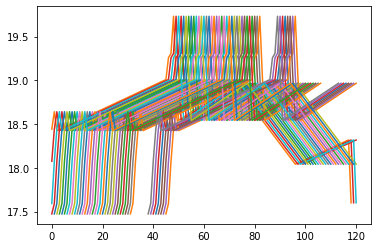

In [51]:
temperatur[(temperatur['temp_mean']<20)]

for observ in temperatur[(temperatur['temp_mean']<19)].temp:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    #sns.lineplot(x=[i for i in range(len(observ))] ,y=np.nanmean(observ))

this observation seems to be related.

- for data preparation the reduction of the temperatur by doing maen average
- or reduction for temperatur for day

### relative humidity

In [52]:
humidity = pd.DataFrame(train.rel_humidity)


In [53]:
# count nan values in each row
def count_nan(row):
    counter = 0
    for x in row:
        if np.isnan(x):
            counter += 1
    return counter 

humidity['count_nan'] = round(humidity['rel_humidity'].apply(count_nan))
humidity.head()
        

,rel_humidity,count_nan
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",105
1,"[0.744583333, 0.808083333, 0.911166667, 0.9163...",0
2,"[0.573333333, 0.597166667, 0.5668333329999999,...",1
3,"[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...",0
4,"[0.8564166670000001, 0.874916667, 0.879833333,...",91


In [54]:
# look into data

humidity_wo_nan = humidity[(humidity['count_nan']== 0)]
humidity_wo_nan.rel_humidity[:3]


1    [0.744583333, 0.808083333, 0.911166667, 0.9163...
3    [0.8430833329999999, 0.79025, 0.7375, 0.728, 0...
5    [0.7566666670000001, 0.7090833329999999, 0.632...
Name: rel_humidity, dtype: object

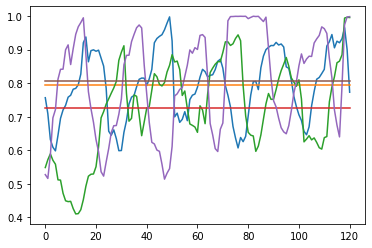

In [55]:

for observ in humidity[(humidity['count_nan']== 0)].rel_humidity[2:5]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    sns.lineplot(x=[i for i in range(len(observ))] ,y=np.nanmean(observ))

- no idea how to handel it 
   - mean?

### wind direction

In [56]:
wind = pd.DataFrame(train.wind_dir)



In [57]:
wind['count_nan'] = round(wind['wind_dir'].apply(count_nan))

KeyboardInterrupt: 

In [ ]:
wind.head()

,wind_dir,count_nan
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",105
1,"[281.6643101, 89.15629262, 81.96853891, 291.01...",0
2,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",46
3,"[300.0850574, 293.6769595, 294.5174647, 301.92...",51
4,"[21.83997432, 17.05405341, 89.26406044, 123.58...",91


look into data without nan values

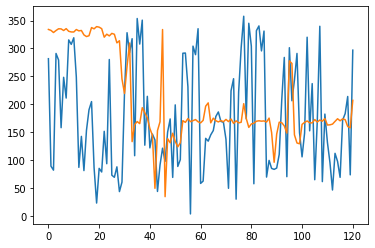

In [ ]:
for observ in wind[(wind['count_nan'] ==0 )].wind_dir[:2]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)

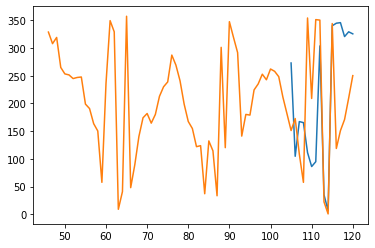

In [ ]:
for observ in wind[(wind['count_nan'] !=0 )].wind_dir[:2]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)

### target
do we see trend?

In [ ]:
target = pd.DataFrame(train.target)

,target
0,45.126304
1,79.131702
2,32.661304
3,53.850238
4,177.418750


<AxesSubplot:ylabel='target'>

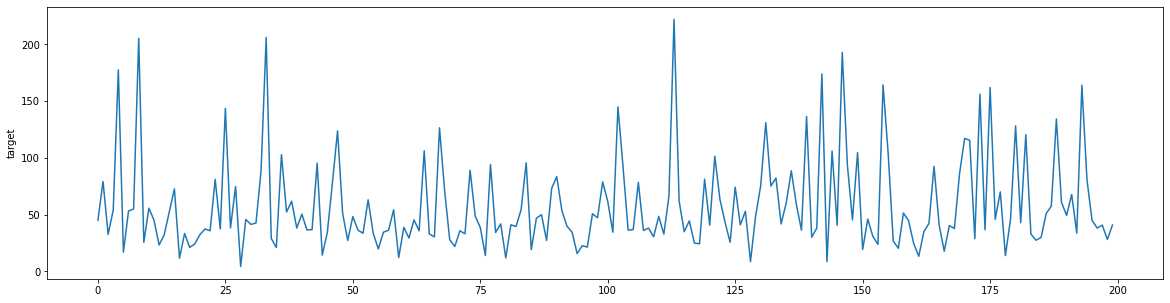

In [ ]:
plt.figure(figsize= (20,5))
sns.lineplot(x=target.index, y = target.target)

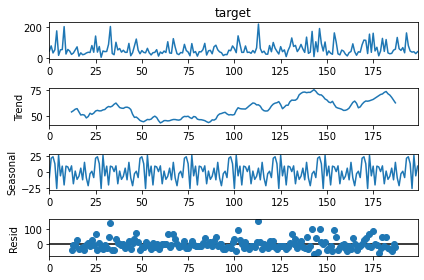

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Clutter-free version of the plot
#1. Compute
seas_decomp_yearly = seasonal_decompose(
    x=target['target'][:200], 
    model='additive', 
    two_sided=True,
    period= 24)

#2. Plot

fig= seas_decomp_yearly.plot()

- grid search for seasonality 

- how good is the data for the largest target values?

In [ ]:
above_350 = train[(train['target']>350)]
above_350

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
813,ID_train_10729,C,"[20.31666667, 20.44166667, 20.325, 20.01666667...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.88425, 0.859083333, 0.90475, 0.934166667, 0...","[175.4970919, 208.340072, 279.18336989999995, ...","[0.309166667, 0.308333333, 0.3775, 0.345833333...","[87.76166667, 87.72666667, 87.66583333, 87.617...",350.437917
1611,ID_train_11447,C,"[22.73333333, 20.95833333, 17.78333333, 18.058...","[0.0, 0.629, 0.6459999999999999, 0.0, 0.017, 0...","[0.7095, 0.773833333, 0.896833333, 0.939333333...","[137.33288149999998, 25.73490787, 357.2235515,...","[0.3675, 0.990833333, 1.089166667, 0.370833333...","[87.7, 87.79583333, 87.81833333, 87.87833333, ...",366.063958
1657,ID_train_11489,C,"[21.23333333, 21.05, 20.45833333, 20.39166667,...","[0.0, 0.0, 0.0, 0.0, 2.774, 12.919, 1.02, 1.19...","[0.901666667, 0.9225, 0.930833333, 0.955833333...","[167.8206971, 169.5665424, 145.1419528, 155.80...","[0.465, 0.3725, 0.36, 0.358333333, 0.4, 0.7375...","[87.84666667, 87.84416667, 87.84083333, 87.809...",370.530652
2083,ID_train_11872,A,"[19.6, 19.56666667, 19.5, 19.15833333, 19.1583...","[0.119, 0.0, 0.017, 0.017, 0.017, 3.539, 1.224...","[0.996916667, 0.999583333, 0.999333333, 0.9992...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.24916667, 88.31583333, 88.36083333, 88.439...",447.340000
5660,ID_train_15091,C,"[22.875, 22.4, 22.03333333, 21.65833333, 21.47...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.991...","[0.818333333, 0.869166667, 0.893333333, 0.9066...","[152.4033876, 153.8179515, 162.5017315, 157.26...","[0.583333333, 0.505833333, 0.5975, 0.465833333...","[87.69166667, 87.765, 87.85416667, 87.865, 87....",475.820000
6627,ID_train_1978,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",354.460208
7327,ID_train_2607,C,"[22.03333333, 21.65833333, 21.475, 21.475, 21....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.991, 1.376999...","[0.893333333, 0.906666667, 0.926666667, 0.9283...","[162.5017315, 157.2675485, 167.2736821, 170.74...","[0.5975, 0.465833333, 0.6525, 0.80083333299999...","[87.85416667, 87.865, 87.85833333, 87.85416667...",371.130000
9349,ID_train_4427,C,"[20.86666667, 20.79166667, 20.6, 20.50833333, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.017, 0.0, 0.0, 0.0...","[0.900666667, 0.91575, 0.936, 0.941583333, 0.9...","[170.4978756, 172.2459429, 153.3469238, 142.78...","[0.8916666670000001, 0.9825, 0.495, 0.3875, 0....","[87.85666667, 87.88666667, 87.93083333, 87.930...",373.133542
9532,ID_train_4592,C,"[21.25833333, 20.68333333, 20.25833333, 20.083...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.835, 0.8773333329999999, 0.895416667, 0.904...","[174.0836604, 176.0309589, 165.5548876, 173.07...","[0.781666667, 0.4241666670000001, 0.311666667,...","[87.8425, 87.88416667, 87.90333333, 87.9641666...",359.334091
10201,ID_train_5194,C,"[21.14166667, 20.86666667, 20.79166667, 20.6, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017, 0.0, 0.0...","[0.887083333, 0.900666667, 0.91575, 0.936, 0.9...","[170.9168624, 170.4978756, 172.2459429, 153.34...","[1.025833333, 0.8916666670000001, 0.9825, 0.49...","[87.83, 87.85666667, 87.88666667, 87.93083333,...",386.051020
